## Hypothesis Testing / Inferential Statistics

### Two-tailed Z-Test with known Population Variance

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

The ABC Company produces screws with a __target length of 100__ millimeters (mm).
The length of the screws follows a __Normal Distribution__ with a (population) __standard deviation of 2 mm__.<br><br>
The machines need to be cleaned and recalibrated once a week. After the cleaning/recalibration process, ABC produces a sample of 20 screws to check whether the machines are correctly calibrated (__mean length = 100 mm__).<br> <br>
After the most recent calibration you suspect that the machines are incorrectly calibrated. Based on the drawn sample (__sample size = 20__) with __sample mean 100.929__ mm, test on a __2% level of significance__, whether the machine is correctly calibrated or corrupted (two-tailed).
<br><br>Calculate the __z-statistic__ and the __p-value__ of your test.

__Corrupted Machine__

In [2]:
mu = 100.7 # unknown
pop_std = 2 # known

In [3]:
sample_size = 20

In [4]:
np.random.seed(123)
sample = np.random.normal(loc = mu, scale = pop_std, size = sample_size)

In [5]:
sample

array([ 98.52873879, 102.69469089, 101.265957  ,  97.68741057,
        99.5427995 , 104.00287307,  95.84664151,  99.84217474,
       103.23187252,  98.9665192 ,  99.3422277 , 100.51058206,
       103.68277925,  99.42219601,  99.81203608,  99.83129745,
       105.11186017, 105.07357218, 102.7081078 , 101.4723728 ])

In [6]:
point_est_mean = sample.mean()
point_est_mean

100.92883546391059

In [7]:
standard_error = pop_std / np.sqrt(sample_size)
standard_error

0.4472135954999579

__H0:__ mean == 100 <br> 
__Ha:__ mean != 100

In [8]:
H0 = 100

__10% Significance Level__

In [9]:
conf = 0.90

In [10]:
stats.norm.interval(conf, loc = H0, scale = standard_error)

(99.26439909541989, 100.73560090458011)

In [11]:
left, right = stats.norm.interval(conf, loc = H0, scale = standard_error)

In [12]:
left

99.26439909541989

In [13]:
right

100.73560090458011

In [14]:
point_est_mean

100.92883546391059

In [15]:
x = np.linspace(97, 103 , 1000)

In [16]:
y = stats.norm.pdf(x, loc = H0, scale = standard_error) 

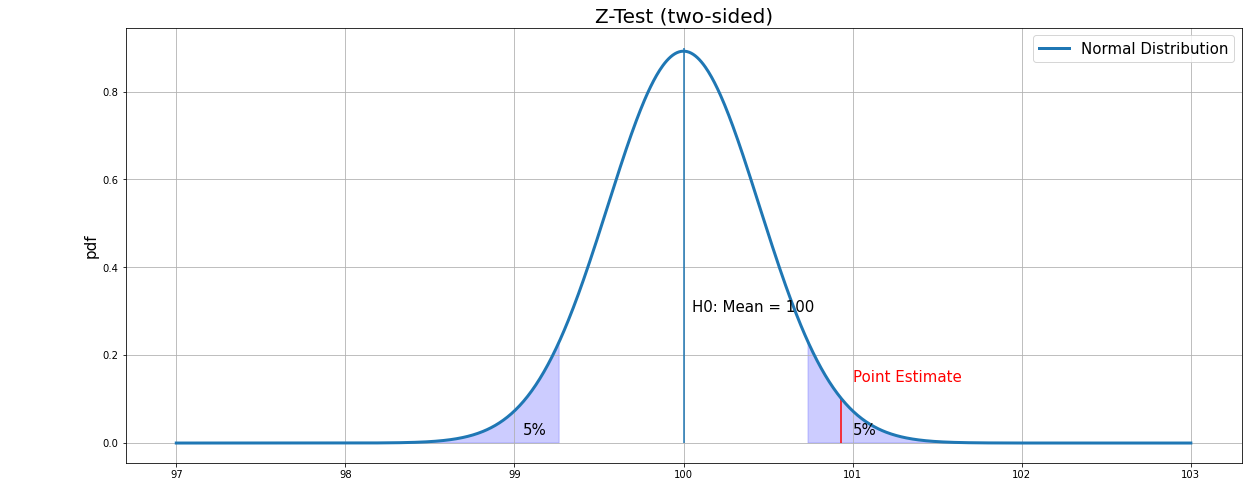

In [17]:
plt.figure(figsize = (20, 8))
plt.plot(x, y, linewidth = 3, label = "Normal Distribution")
plt.vlines(x = H0, ymin = 0, ymax = 0.90)
plt.vlines(x = point_est_mean, ymin = 0, ymax = 0.1, color = "red")
plt.fill_between(x, y, where = ((x > right) | (x < left)), color = "blue", alpha = 0.2)
plt.annotate("5%", xy = (99.05, 0.02), fontsize = 15)
plt.annotate("5%", xy = (101, 0.02), fontsize = 15)
plt.annotate("Reject H0!\nMachine is corrupted!", xy = (96, 0.5), fontsize = 30)
plt.annotate("H0: Mean = 100", xy = (100.05, 0.3), fontsize = 15)
plt.annotate("Point Estimate", xy = (101, 0.14), color = "red",fontsize = 15)
plt.grid()
plt.title("Z-Test (two-sided)", fontsize = 20)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

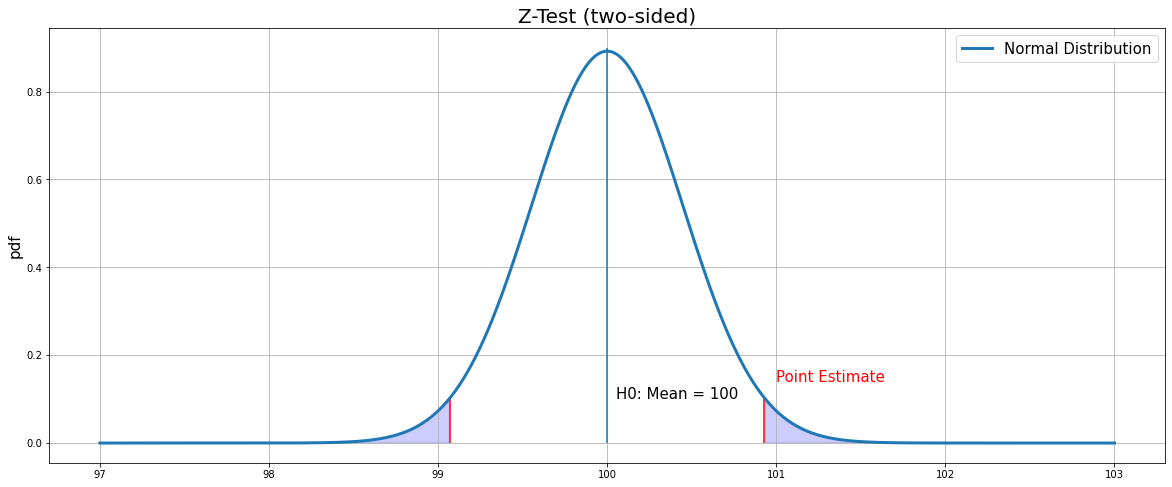

In [23]:
plt.figure(figsize = (20, 8))
plt.plot(x, y, linewidth = 3, label = "Normal Distribution")
plt.vlines(x = H0, ymin = 0, ymax = 0.90)
plt.vlines(x = point_est_mean, ymin = 0, ymax = 0.1, color = "red")
plt.vlines(x = H0-(point_est_mean-H0), ymin = 0, ymax = 0.1, color = "red")
plt.fill_between(x, y, where = ((x > point_est_mean) | (x < (H0-(point_est_mean-H0)))), color = "blue", alpha = 0.2)
#plt.annotate("0.5 p-value", xy = (98.5, 0.04), fontsize = 15)
#plt.annotate("0.5 p-value", xy = (101, 0.02), fontsize = 15)
#plt.annotate("Reject H0!\nMachine is corrupted!", xy = (96, 0.5), fontsize = 30)
plt.annotate("H0: Mean = 100", xy = (100.05, 0.1), fontsize = 15)
plt.annotate("Point Estimate", xy = (101, 0.14), color = "red",fontsize = 15)
plt.grid()
plt.title("Z-Test (two-sided)", fontsize = 20)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

__Lower Level of Significance (2%)__

In [24]:
conf = 0.98

In [25]:
stats.norm.interval(conf, loc = H0, scale = standard_error)

(98.95962560286651, 101.04037439713349)

In [26]:
left, right = stats.norm.interval(conf, loc = H0, scale = standard_error)

In [27]:
x = np.linspace(96, 104 , 1000)

In [28]:
y = stats.norm.pdf(x, loc = H0, scale = standard_error) 

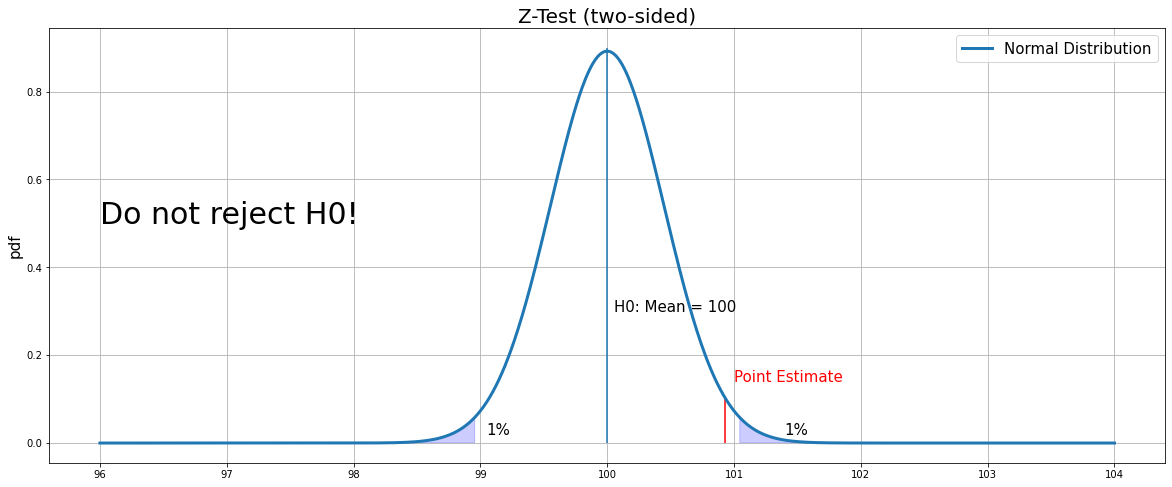

In [29]:
plt.figure(figsize = (20, 8))
plt.plot(x, y, linewidth = 3, label = "Normal Distribution")
plt.vlines(x = H0, ymin = 0, ymax = 0.90)
plt.vlines(x = point_est_mean, ymin = 0, ymax = 0.1, color = "red")
plt.fill_between(x, y, where = ((x > right) | (x < left)), color = "blue", alpha = 0.2)
plt.annotate("1%", xy = (99.05, 0.02), fontsize = 15)
plt.annotate("1%", xy = (101.4, 0.02), fontsize = 15)
plt.annotate("Do not reject H0!", xy = (96, 0.5), fontsize = 30)
plt.annotate("H0: Mean = 100", xy = (100.05, 0.3), fontsize = 15)
plt.annotate("Point Estimate", xy = (101, 0.14), color = "red",fontsize = 15)
plt.grid()
plt.title("Z-Test (two-sided)", fontsize = 20)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### Calculating and interpreting z-statistic and p-value

In [18]:
z_stat = (point_est_mean - H0) / standard_error
z_stat

2.0769392372166267

In [19]:
stats.norm.cdf(-abs(z_stat))

0.01890358386435081

In [20]:
p_value = 2 * stats.norm.cdf(-abs(z_stat))

In [21]:
p_value

0.03780716772870162

In [22]:
x = np.linspace(-4, 4, 1000)

In [23]:
y = stats.norm.pdf(x)

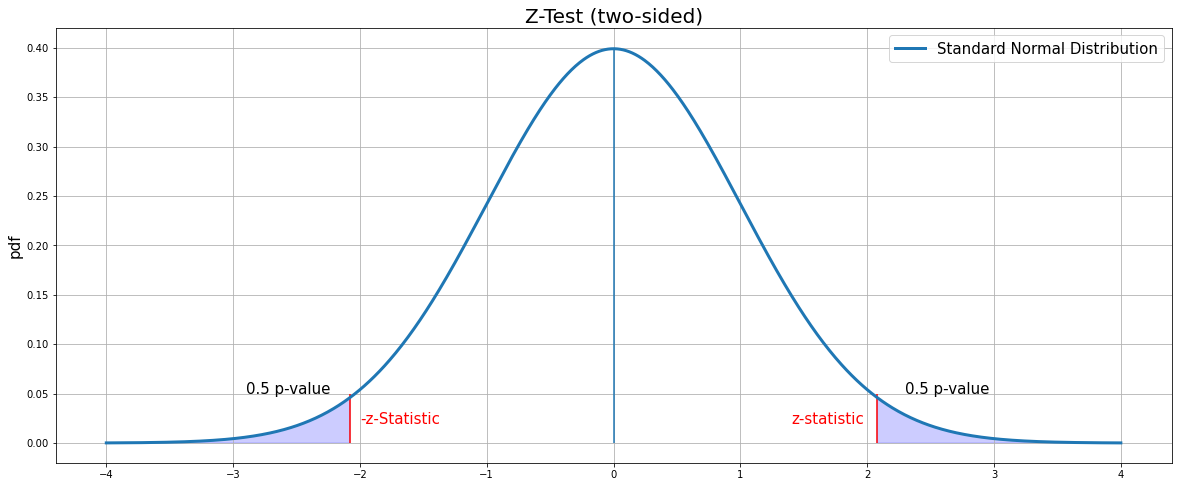

In [24]:
plt.figure(figsize = (20, 8))
plt.plot(x, y, linewidth = 3, label = "Standard Normal Distribution")
plt.vlines(x = 0, ymin = 0, ymax = 0.40)
plt.vlines(x = z_stat, ymin = 0, ymax = 0.05, color = "red")
plt.vlines(x = -z_stat, ymin = 0, ymax = 0.05, color = "red")
plt.fill_between(x, y, where = ((x > abs(z_stat)) | (x < -abs(z_stat))), color = "blue", alpha = 0.2)
plt.annotate("0.5 p-value", xy = (-2.9, 0.05), fontsize = 15)
plt.annotate("0.5 p-value", xy = (2.3, 0.05), fontsize = 15)
plt.annotate("-z-Statistic", xy = (-2, 0.02), color = "red", fontsize = 15)
plt.annotate("z-statistic", xy = (1.4, 0.02), color = "red",fontsize = 15)
plt.grid()
plt.title("Z-Test (two-sided)", fontsize = 20)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### One-tailed Z-Test with known Population Variance

In [25]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

After the most recent calibration you suspect that the machines are incorrectly calibrated and produce screws with a __mean length greater than 100 mm__.  Based on the drawn sample (__sample size = 20__) with __sample mean 100.929__ mm, perform a one-tailed test with __5% level of significance__. <br><br>Calculate the z-statistic and the p-value of your test.

__H0:__ mean <= 100 <br> 
__Ha:__ mean > 100

__Corrupted Machine__

In [26]:
mu = 100.7 # unknown
pop_std = 2 # known

In [27]:
sample_size = 20

In [28]:
np.random.seed(123)
sample = np.random.normal(loc = mu, scale = pop_std, size = sample_size)

In [29]:
sample

array([ 98.52873879, 102.69469089, 101.265957  ,  97.68741057,
        99.5427995 , 104.00287307,  95.84664151,  99.84217474,
       103.23187252,  98.9665192 ,  99.3422277 , 100.51058206,
       103.68277925,  99.42219601,  99.81203608,  99.83129745,
       105.11186017, 105.07357218, 102.7081078 , 101.4723728 ])

In [30]:
point_est_mean = sample.mean()
point_est_mean

100.92883546391059

In [31]:
standard_error = pop_std / np.sqrt(sample_size)
standard_error

0.4472135954999579

In [32]:
H0 = 100

In [33]:
conf = 0.95

In [34]:
stats.norm.ppf(0.95, loc = H0, scale = standard_error)

100.73560090458011

In [35]:
right = stats.norm.ppf(conf, loc = H0, scale = standard_error)
right

100.73560090458011

In [36]:
x = np.linspace(96, 104 , 1000)

In [37]:
y = stats.norm.pdf(x, loc = H0, scale = standard_error) 

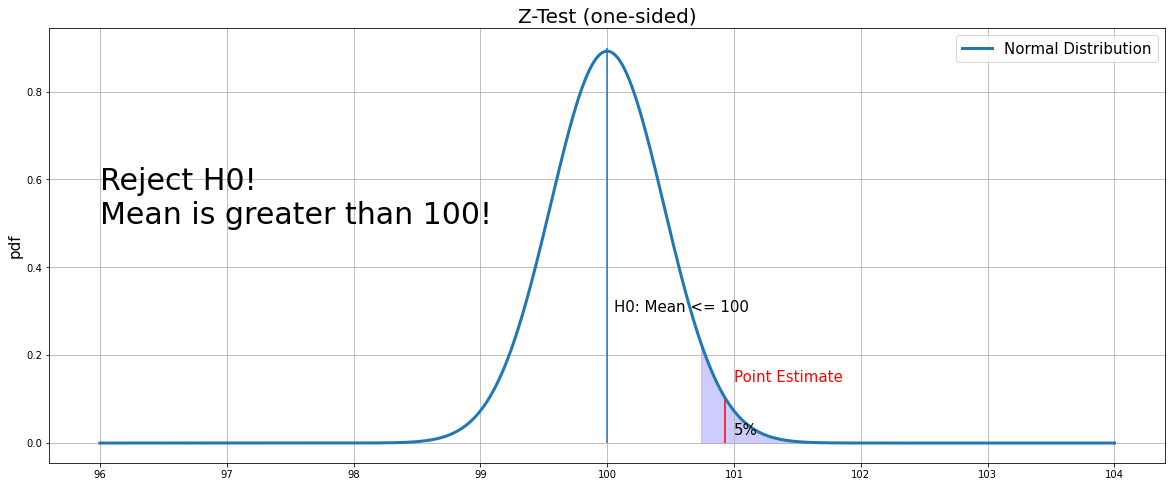

In [38]:
plt.figure(figsize = (20, 8))
plt.plot(x, y, linewidth = 3, label = "Normal Distribution")
plt.vlines(x = H0, ymin = 0, ymax = 0.90)
plt.vlines(x = point_est_mean, ymin = 0, ymax = 0.1, color = "red")
plt.fill_between(x, y, where = ((x > right)), color = "blue", alpha = 0.2)
plt.annotate("5%", xy = (101, 0.02), fontsize = 15)
plt.annotate("Reject H0!\nMean is greater than 100!", xy = (96, 0.5), fontsize = 30)
plt.annotate("H0: Mean <= 100", xy = (100.05, 0.3), fontsize = 15)
plt.annotate("Point Estimate", xy = (101, 0.14), color = "red",fontsize = 15)
plt.grid()
plt.title("Z-Test (one-sided)", fontsize = 20)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [39]:
z_stat = (point_est_mean - H0) / standard_error
z_stat

2.0769392372166267

In [40]:
p_value = stats.norm.cdf(-abs(z_stat))

In [41]:
p_value

0.01890358386435081

### Two-sided t-Test (unknown Population Variance)

In [42]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

The S&P 500, or just the S&P, is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. The S&P 500 is a capitalization-weighted index and the performance of the 10 largest companies in the index account for 21.8% of the performance of the index. <br> <br>
You have a random sample with 50 stocks/companies and their annual returns for the year 2017 (__sample size = 50__). <br>Test on a __5% level of significance__, whether the (equally-weighted) mean return for the whole S&P 500 population for the year 2017 is __equal to 0%__ or not. Calculate the t-statistic and the p-value of your test.<br> <br>  Assume a __sample mean of 25.32%__ and a __sample standard deviation of 30.50%__.  

__H0:__ The mean return is equal to 0%. <br> 
__Ha:__ The mean return is unequal to 0%.

In [43]:
sample = np.loadtxt("sample.csv", delimiter = ",", usecols = 1)

In [44]:
sample

array([ 0.41576819,  0.15943993,  0.48012232,  0.57522782, -0.03451387,
        0.13844277,  0.17431897,  0.37182448,  0.34250291,  0.06699958,
        0.0982179 , -0.01147507,  0.49115226,  0.10660878,  0.94879205,
       -0.12201533,  0.04721855, -0.07336731,  0.2923796 ,  0.70641987,
        0.42263036,  0.38171074, -0.12320499,  0.24007071,  0.19244604,
        0.25205737, -0.00221189,  0.89433453, -0.09650582,  0.20288154,
        0.09163142,  0.37535726,  0.10399562,  0.18938513, -0.12747465,
        0.14833447,  0.24391856,  0.2305725 , -0.09347443,  1.32300163,
        0.11514778,  0.70218553,  0.35575652, -0.00843012,  0.50274579,
        0.26261244,  0.12447579, -0.09328358, -0.02459508,  0.69915894])

In [45]:
sample_size = sample.size
sample.size

50

In [46]:
point_est_mean = sample.mean()
point_est_mean

0.25318589009450754

In [47]:
standard_error = sample.std(ddof = 1) / np.sqrt(sample_size)
standard_error

0.04312863904037249

__5% Significance Level__

In [48]:
H0 = 0

In [49]:
conf = 0.95

In [50]:
stats.t.interval(conf, loc = H0, scale = standard_error, df = sample_size - 1)

(-0.086670244912757, 0.086670244912757)

In [51]:
left, right = stats.t.interval(conf, loc = H0, scale = standard_error, df = sample_size - 1)

In [52]:
left

-0.086670244912757

In [53]:
right

0.086670244912757

In [54]:
point_est_mean

0.25318589009450754

In [55]:
x = np.linspace(-0.2, 0.2 , 1000)

In [56]:
y = stats.t.pdf(x, loc = H0, scale = standard_error, df = sample_size - 1) 

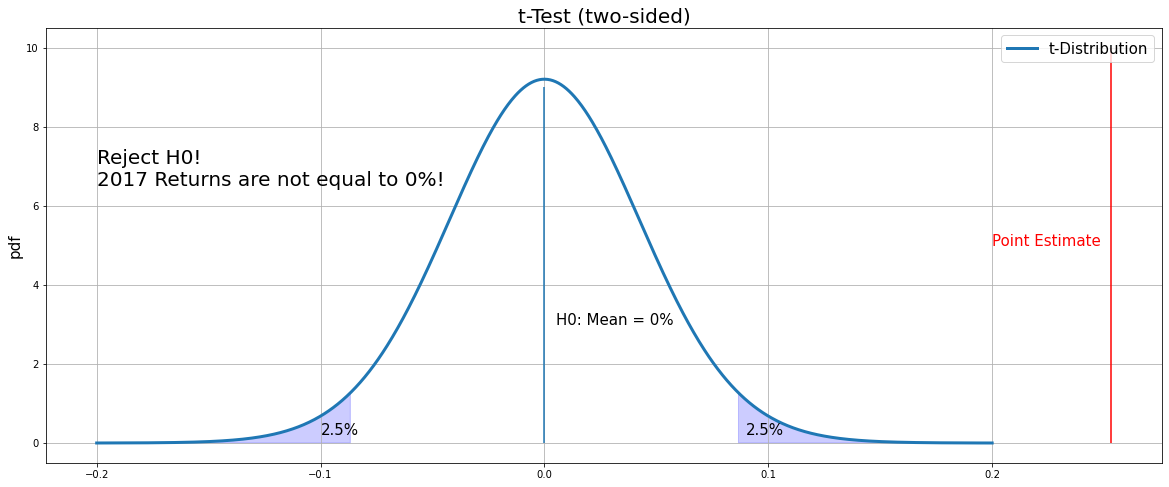

In [57]:
plt.figure(figsize = (20, 8))
plt.plot(x, y, linewidth = 3, label = "t-Distribution")
plt.vlines(x = H0, ymin = 0, ymax = 9)
plt.vlines(x = point_est_mean, ymin = 0, ymax = 10, color = "red")
plt.fill_between(x, y, where = ((x > right) | (x < left)), color = "blue", alpha = 0.2)
plt.annotate("2.5%", xy = (-0.1, 0.2), fontsize = 15)
plt.annotate("2.5%", xy = (0.09, 0.2), fontsize = 15)
plt.annotate("Reject H0!\n2017 Returns are not equal to 0%!", xy = (-0.2, 6.5), fontsize = 20)
plt.annotate("H0: Mean = 0%", xy = (0.005, 3), fontsize = 15)
plt.annotate("Point Estimate", xy = (0.2, 5), color = "red",fontsize = 15)
plt.grid()
plt.title("t-Test (two-sided)", fontsize = 20)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [58]:
t_stat = (point_est_mean - H0) / standard_error

In [59]:
t_stat

5.8704817895482755

In [60]:
p_value = 2 * stats.t.cdf(-abs(t_stat), df = sample_size - 1)

In [61]:
p_value

3.703114209694338e-07

In [62]:
format(p_value, ".10f")

'0.0000003703'

In [64]:
stats.ttest_1samp(sample, H0)

Ttest_1sampResult(statistic=5.8704817895482755, pvalue=3.703114209694338e-07)

In [65]:
t_stat, p_value = stats.ttest_1samp(sample, H0)

In [66]:
t_stat

5.8704817895482755

In [67]:
p_value

3.703114209694338e-07

### One-sided t-test

In [68]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

You have a random sample with 50 stocks/companies and their annual returns for the year 2017 (__sample size = 50__). Test on a __5% level of significance__, whether the (equally-weighted) mean return for the whole S&P 500 population for the year 2017 is __equal to or less than 15%__ (H0). Assume a sample mean of 25.32% and a sample standard deviation of 30.50%. Calculate the t-statistic and the p-value of your test.

__H0:__ The mean return is equal to or less than 15%. <br> 
__Ha:__ The mean return is greater than 15%.

In [69]:
sample = np.loadtxt("sample.csv", delimiter = ",", usecols = 1)

In [70]:
sample

array([ 0.41576819,  0.15943993,  0.48012232,  0.57522782, -0.03451387,
        0.13844277,  0.17431897,  0.37182448,  0.34250291,  0.06699958,
        0.0982179 , -0.01147507,  0.49115226,  0.10660878,  0.94879205,
       -0.12201533,  0.04721855, -0.07336731,  0.2923796 ,  0.70641987,
        0.42263036,  0.38171074, -0.12320499,  0.24007071,  0.19244604,
        0.25205737, -0.00221189,  0.89433453, -0.09650582,  0.20288154,
        0.09163142,  0.37535726,  0.10399562,  0.18938513, -0.12747465,
        0.14833447,  0.24391856,  0.2305725 , -0.09347443,  1.32300163,
        0.11514778,  0.70218553,  0.35575652, -0.00843012,  0.50274579,
        0.26261244,  0.12447579, -0.09328358, -0.02459508,  0.69915894])

In [71]:
sample_size = sample.size
sample.size

50

In [72]:
point_est_mean = sample.mean()
point_est_mean

0.25318589009450754

In [73]:
standard_error = sample.std(ddof = 1) / np.sqrt(sample_size)
standard_error

0.04312863904037249

In [74]:
H0 = 0.15

In [75]:
t_stat = (point_est_mean - H0) / standard_error

In [76]:
t_stat

2.3925144032000585

In [77]:
p_value = stats.t.cdf(-abs(t_stat), df = sample_size - 1)

In [78]:
p_value

0.010306114330592458

In [79]:
stats.ttest_1samp(sample, H0)

Ttest_1sampResult(statistic=2.3925144032000585, pvalue=0.020612228661184916)